In [161]:
# Importing libraries

import pandas as pd
import numpy as np
import scipy

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, accuracy_score 
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

In [162]:
# Reading the provided file

df = pd.read_csv('music_dataset_mod.csv')
df.head()

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre
0,114.618354,57.976367,53.251766,99.061840,14.686768,17.628630,46.545522,75.839434,79.378892,71.753088,96.439665,53.771763,Country
1,116.672803,69.387087,95.787280,90.831033,47.280419,-15.618194,85.421085,100.455908,0.713015,0.000000,17.327295,15.017146,Classical
2,128.328121,52.930677,65.701187,104.439247,5.984994,50.467388,18.006722,77.642913,80.652946,87.692110,95.125207,25.308020,Rock
3,128.511337,25.494755,14.095374,40.106130,47.715584,87.335201,68.603329,63.536557,74.888346,76.239108,97.016998,96.893109,Hip-hop
4,135.474190,45.174876,101.469872,70.002203,108.177637,25.865590,31.295163,81.121030,36.178193,23.381542,53.753793,30.142986,Country


In [163]:
data = df.copy()

In [164]:
# How does my genre column look like? 

data.groupby('Genre').size()

Genre
Classical    162
Country      180
Hip-hop      168
Jazz         190
Rock         190
dtype: int64

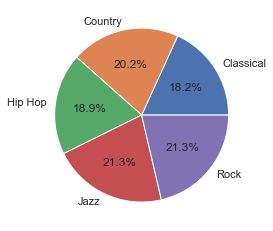

In [165]:
classical = 162
country = 180
hiphop = 168
jazz = 190
rock = 190

#Let's analyze genre distribution

genre_total = classical + country + hiphop + jazz + rock

pct_classical = (classical/genre_total) * 100
pct_country = (country/genre_total) * 100
pct_hiphop = (hiphop/genre_total) * 100
pct_jazz = (jazz/genre_total) * 100
pct_rock = (rock/genre_total) * 100

#Pie chart of each source

plt.figure(figsize=(4,4))
labels = ["Classical", "Country", "Hip Hop", "Jazz", "Rock"]
values = [pct_classical, pct_country, pct_hiphop, pct_jazz, pct_rock] 
plt.pie(values, labels=labels, autopct="%.1f%%")
plt.show()

It looks like the provided dataset is well balanced and will allow the predictive model to learn about each genre equally

In [166]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Tempo                        1000 non-null   float64
 1   Dynamics Range               1000 non-null   float64
 2   Vocal Presence               1000 non-null   float64
 3   Percussion Strength          1000 non-null   float64
 4   String Instrument Detection  1000 non-null   float64
 5   Electronic Element Presence  1000 non-null   float64
 6   Rhythm Complexity            1000 non-null   float64
 7   Drums Influence              1000 non-null   float64
 8   Distorted Guitar             1000 non-null   float64
 9   Metal Frequencies            1000 non-null   float64
 10  Ambient Sound Influence      1000 non-null   float64
 11  Instrumental Overlaps        1000 non-null   float64
 12  Genre                        890 non-null    object 
dtypes: float64(12), obj

In [167]:
data.Genre.unique()

array(['Country', 'Classical', 'Rock', 'Hip-hop', nan, 'Jazz'],
      dtype=object)

The column Genre contains null values (110)

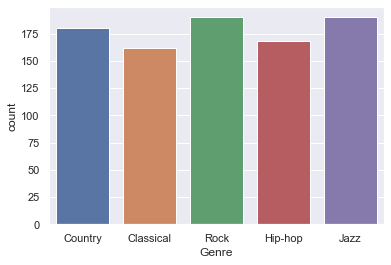

In [168]:
# count plot on single categorical variable
sns.countplot(x ='Genre', data = data)
 
# Show the plot
plt.show()

In [169]:
# Lets exclude the null rows in the Genre column

clean_data = data.dropna()

In [170]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 890 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Tempo                        890 non-null    float64
 1   Dynamics Range               890 non-null    float64
 2   Vocal Presence               890 non-null    float64
 3   Percussion Strength          890 non-null    float64
 4   String Instrument Detection  890 non-null    float64
 5   Electronic Element Presence  890 non-null    float64
 6   Rhythm Complexity            890 non-null    float64
 7   Drums Influence              890 non-null    float64
 8   Distorted Guitar             890 non-null    float64
 9   Metal Frequencies            890 non-null    float64
 10  Ambient Sound Influence      890 non-null    float64
 11  Instrumental Overlaps        890 non-null    float64
 12  Genre                        890 non-null    object 
dtypes: float64(12), obje

In [171]:
# Splitting data

X = clean_data[['Tempo', 'Dynamics Range', 'Vocal Presence', 'Percussion Strength', 
                     'String Instrument Detection', 'Electronic Element Presence', 'Rhythm Complexity', 
                     'Drums Influence', 'Distorted Guitar', 'Metal Frequencies', 'Ambient Sound Influence', 
                     'Instrumental Overlaps']]
y = clean_data['Genre']

In [172]:
# Import label encoder 

from sklearn import preprocessing 

label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'Genre'

y_encoded = label_encoder.fit_transform(y) 

clean_data['Genre'] = y_encoded

clean_data['Genre'].unique()

array([1, 0, 4, 2, 3])

In [173]:
# Lets see the clean_data dataframe with the new encoded Genre column

clean_data.head()

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre
0,114.618354,57.976367,53.251766,99.061840,14.686768,17.628630,46.545522,75.839434,79.378892,71.753088,96.439665,53.771763,1
1,116.672803,69.387087,95.787280,90.831033,47.280419,-15.618194,85.421085,100.455908,0.713015,0.000000,17.327295,15.017146,0
2,128.328121,52.930677,65.701187,104.439247,5.984994,50.467388,18.006722,77.642913,80.652946,87.692110,95.125207,25.308020,4
3,128.511337,25.494755,14.095374,40.106130,47.715584,87.335201,68.603329,63.536557,74.888346,76.239108,97.016998,96.893109,2
4,135.474190,45.174876,101.469872,70.002203,108.177637,25.865590,31.295163,81.121030,36.178193,23.381542,53.753793,30.142986,1


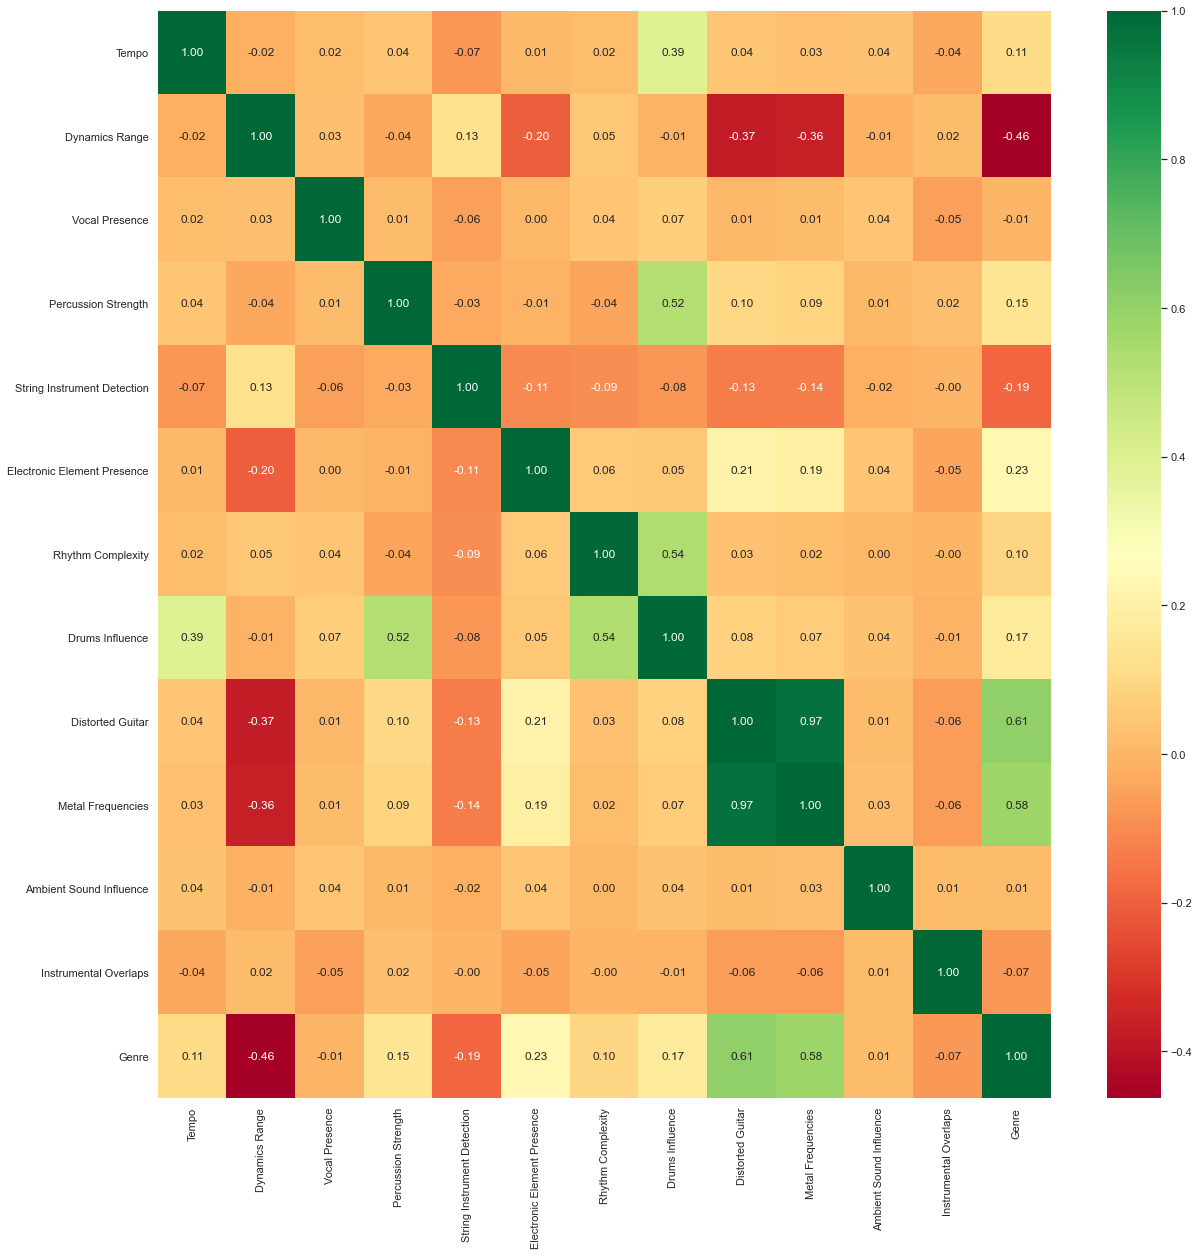

In [174]:
# Plotting correlation heatmap 
  
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(clean_data.corr(), annot=True, fmt='.2f', cmap='RdYlGn', ax=ax)
plt.show()

In [186]:
# PCA for Dimensionality Reduction

# Standardize the data (required for PCA analysis)

scaler = StandardScaler()

# mean-centers and auto-scales the data

X_std = scaler.fit_transform(X)

In [187]:
# Lets create an instance of the PCA() class without specifying the number of components initially. 
# This will allow us to observe the variance explained by each potential component

pca = PCA()

In [188]:
x_pca = pca.fit(X_std)

# To get how many principal components was chosen

print(pca.n_components_)

12


We found that we have a total of 12 components

In [189]:
# Calculate the cumulative explained variance (how much variance each component carries)

cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Determine the number of components to keep for 80% variance explained

n_components = np.argmax(cumulative_variance_ratio >= 0.8) + 1

# Apply PCA with the selected number of components

pca = PCA(n_components=n_components)

print(pca.n_components)

8


The minimum number of components that collectively account for at least 80% of the total variance is 8

In [192]:
pca = PCA(n_components).fit(X_std)

explained_variance = pca.explained_variance_ratio_

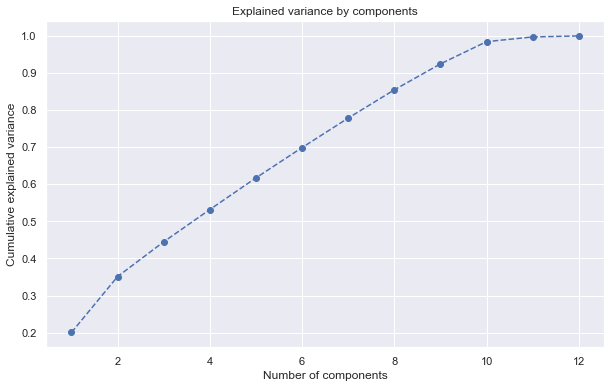

In [194]:
plt.figure(figsize=(10,6))
plt.plot(range(1,13),cumulative_variance_ratio,marker='o', linestyle='--')
plt.title('Explained variance by components')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [196]:
n_components = 8

pca = PCA(n_components=8)
X_pca = pca.fit_transform(X_std)

In [197]:
# Train/Test/Split

x_train, x_test, y_train, y_test = train_test_split(X_pca, y_encoded ,test_size = 0.3, shuffle=False)

In [198]:
classifier = LogisticRegression(max_iter=10000)

classifier.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [215]:
y_pred = classifier.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Accuracy: 0.21722846441947566

Classification Report:
               precision    recall  f1-score   support

   Classical       0.22      0.24      0.23        45
     Country       0.20      0.19      0.19        54
     Hip-hop       0.21      0.25      0.23        48
        Jazz       0.24      0.23      0.23        57
        Rock       0.21      0.19      0.20        63

    accuracy                           0.22       267
   macro avg       0.22      0.22      0.22       267
weighted avg       0.22      0.22      0.22       267



In [201]:
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X_std, y_encoded, test_size=0.3, random_state=42)
logreg_orig = LogisticRegression(max_iter=10000)

logreg_orig.fit(X_train_orig, y_train_orig)

LogisticRegression(max_iter=10000)

In [211]:
y_pred_orig = logreg_orig.predict(X_test_orig)

print("Accuracy with Original Features:", accuracy_score(y_test_orig, y_pred_orig))

print("\nClassification Report with Original Features:\n", classification_report(y_test_orig, y_pred_orig, target_names=label_encoder.classes_))

Accuracy with Original Features: 0.5280898876404494

Classification Report with Original Features:
               precision    recall  f1-score   support

   Classical       0.86      0.98      0.92        51
     Country       0.33      0.25      0.28        52
     Hip-hop       0.45      0.46      0.45        48
        Jazz       0.44      0.39      0.41        62
        Rock       0.49      0.59      0.54        54

    accuracy                           0.53       267
   macro avg       0.51      0.53      0.52       267
weighted avg       0.51      0.53      0.52       267



In [218]:
df_unknown_genre = clean_data[clean_data['Genre'].isnull()]

In [232]:
# Prepare the data for prediction
X_unknown = df_unknown_genre.drop(columns=['Genre'])
X_unknown_scaled = scaler.transform(X_unknown)
X_unknown_pca = pca.transform(X_unknown_scaled)

# Predict the genres
y_unknown_pred = classifier.predict(X_unknown_pca)

ValueError: Found array with 0 sample(s) (shape=(0, 12)) while a minimum of 1 is required by StandardScaler.

In [234]:
# Assign the predicted genres back to the DataFrame

df_unknown_genre.loc[:, 'Predicted_Genre'] = label_encoder.inverse_transform(y_unknown_pred)

NameError: name 'y_unknown_pred' is not defined

In [226]:
X_unknown_pca = pca.transform(X_unknown_scaled)

NameError: name 'X_unknown_scaled' is not defined

In [209]:
y_unknown_pred = classifier.predict(X_unknown_pca)

NameError: name 'X_unknown_pca' is not defined

In [217]:
df_unknown_genre.loc[:, 'Predicted_Genre'] = label_encoder.inverse_transform(y_unknown_pred)

print(df_unknown_genre[['Predicted_Genre']])

NameError: name 'y_unknown_pred' is not defined